# MTH_9855_Homework_02
## Sun, Yu

### Problem. 1
#### Part. (a)

In [1]:
df <- read.csv('BetaExample.txt', sep="|")
tickers <- unique(df$TICKER)

betas <- rep(0, length(tickers))
names(betas) <- tickers

for(ticker in tickers){
    # get sub data set
    datatmp <- df[df$TICKER == ticker,]
    data <- datatmp[(as.Date(datatmp$DATE) < as.Date('01-01-2015', format = "%d-%m-%Y")),]
    # run linear regression
    model <- lm(R ~ RM + 0, data = data)
    betas[ticker] <- coef(model)
    cat("For ticker", ticker, " beta is", coef(model), "\n") 
    print(summary(model)$coefficients)
}

For ticker IBM  beta is 0.9067384 
    Estimate Std. Error  t value Pr(>|t|)
RM 0.9067384 0.01620043 55.97004        0
For ticker AAPL  beta is 1.1363 
   Estimate Std. Error  t value      Pr(>|t|)
RM   1.1363 0.02934033 38.72828 1.606052e-294
For ticker TSLA  beta is 1.310085 
   Estimate Std. Error  t value     Pr(>|t|)
RM 1.310085   0.104407 12.54786 6.510896e-34


<font color = 'blue'>
For all three, the t value is large, we'll reject the null hypothesis that $\beta = 0 $

#### Part. (b)

In [2]:
M <- matrix(0, length(tickers), 3)

rownames(M) <- tickers
colnames(M) <- c('AAPL', 'BETA', 'INTERCEPT')

M['AAPL', 'AAPL'] <- 1.0

for(ticker in tickers){
    M[ticker, 'BETA'] <- betas[ticker]
} 
M[,'INTERCEPT'] <- 1.0

v <- rep(0, 3)
names(v) <- c('AAPL', 'BETA', 'INTERCEPT')
v['AAPL'] <- 1.0

h <- solve(t(M), v)
print(h)

       IBM       AAPL       TSLA 
-0.4308561  1.0000000 -0.5691439 


#### Part. (c)

NULL


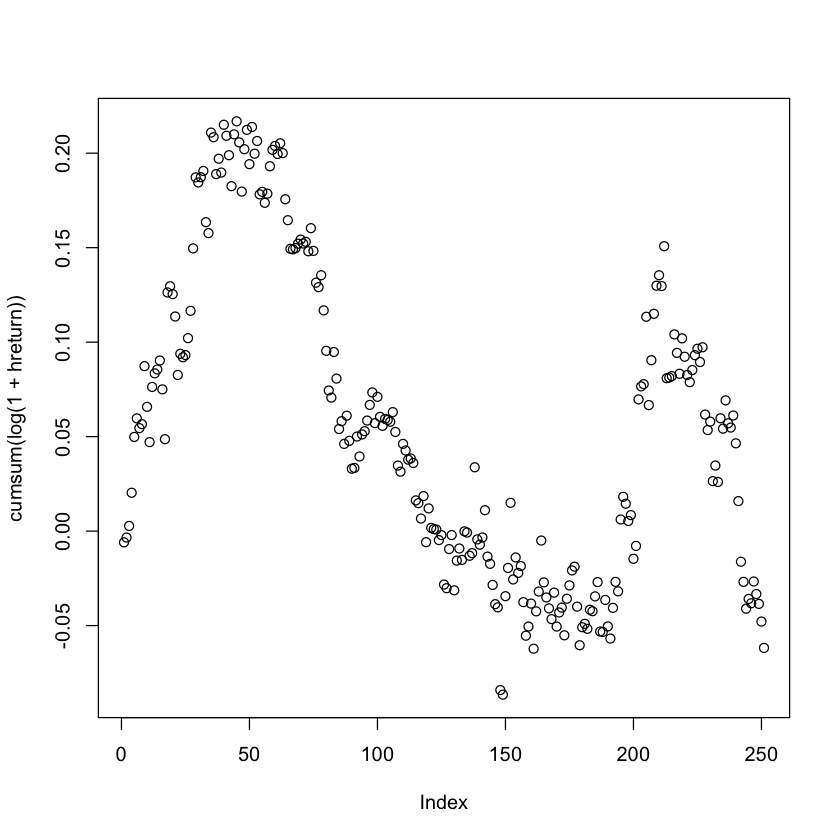

In [3]:
library(reshape2)

test <- df[(as.Date(df$DATE) > as.Date('31-12-2014',format = "%d-%m-%Y")),]
testdata <- dcast(test, DATE ~ TICKER, value.var = 'R')
testdata2 <- testdata[, c("IBM", "AAPL", "TSLA")]

hreturn <- as.matrix(testdata2) %*% h
print(plot(cumsum(log(1.0 + hreturn))))

#### Part. (d)

In [10]:
head(dcast(test, DATE ~ TICKER, value.var = 'RM'))

DATE,AAPL,IBM,TSLA
2015-01-02,-0.000340,-0.000340,-0.000340
2015-01-05,-0.018278,-0.018278,-0.018278
2015-01-06,-0.008893,-0.008893,-0.008893
2015-01-07,0.011630,0.011630,0.011630
2015-01-08,0.017888,0.017888,0.017888
2015-01-09,-0.008404,-0.008404,-0.008404


In [4]:
RM <- dcast(test, DATE ~ TICKER, value.var = 'RM')$IBM
print(cor(hreturn, RM))
result <- lm(hreturn ~ RM + 0)
print(summary(result)$coefficients)

           [,1]
[1,] 0.02919532
    Estimate Std. Error   t value  Pr(>|t|)
RM 0.0547973  0.1187618 0.4614051 0.6449092


In [8]:
RM

[1] -0.000340 -0.018278 -0.008893  0.011630  0.017888 -0.008404 -0.008094
  [8] -0.002579 -0.005813 -0.009248  0.013424  0.001550  0.004732  0.015270
 [15] -0.005492  0.002568 -0.013388 -0.013496  0.009535 -0.012992  0.012962
 [22]  0.014439 -0.004156  0.010291 -0.003418 -0.004247  0.010676 -0.000029
 [29]  0.009645  0.004075  0.001598 -0.000314 -0.001062  0.006126 -0.000303
 [36]  0.002759 -0.000766 -0.001476 -0.002956  0.006125 -0.004539 -0.004389
 [43]  0.001196 -0.014174  0.003944 -0.016961 -0.001918  0.012601 -0.006075
 [50]  0.013534 -0.003320  0.012158 -0.004873  0.009013 -0.001746 -0.006139
 [57] -0.014559 -0.002377  0.002369  0.012237 -0.008796 -0.003965  0.003530
 [64]  0.006609 -0.002062  0.002683  0.004457  0.005203 -0.004581  0.001630
 [71]  0.005148 -0.000778 -0.011311  0.009235 -0.001481  0.005088  0.002358
 [78]  0.002253 -0.004141  0.002769 -0.003740 -0.010129  0.010923  0.002941
 [85] -0.011837 -0.004456  0.003774  0.013458 -0.005090 -0.002950 -0.000305
 [92]  0.010779  0.000768  0.003048 -0.000643 -0.000931  0.002338 -0.002234
 [99] -0.010282  0.009163 -0.001267 -0.006318  0.002059 -0.001009  0.002119
[106] -0.008623 -0.001436 -0.006474  0.000418  0.012042  0.001739 -0.006994
[113] -0.004622  0.005690  0.001980  0.009903 -0.005304  0.006095  0.000636
[120] -0.007353 -0.002974 -0.000390 -0.020866  0.002658  0.006936 -0.000308
[127] -0.003862  0.006081 -0.016653  0.002262  0.012338  0.011066  0.004453
[134] -0.000735  0.008015  0.001106  0.000771 -0.004262 -0.002388 -0.005676
[141] -0.010703 -0.005775  0.012386  0.007319  0.000028 -0.002272 -0.002757
[148] -0.002250  0.003115 -0.007753 -0.002875  0.012808 -0.009557  0.000950
[155] -0.001275  0.003912  0.005211 -0.002626 -0.008255 -0.021100 -0.031851
[162] -0.039414 -0.013522  0.039034  0.024298  0.000609 -0.008392 -0.029576
[169]  0.018293  0.001165 -0.015330  0.025083 -0.013898  0.005278  0.004487
[176] -0.004090  0.012831  0.008705 -0.002561 -0.016164  0.004566 -0.012318
[183] -0.002049 -0.003363 -0.000466 -0.025666  0.001233  0.019076  0.001974
[190]  0.014315  0.018290 -0.003588  0.008036  0.008818  0.000725  0.001276
[197] -0.006825 -0.004716  0.014853  0.004570  0.000271 -0.001421 -0.005825
[204]  0.016628  0.011030 -0.001913 -0.002554  0.011840 -0.000450 -0.004810
[211]  0.011874  0.002728 -0.003545 -0.001132 -0.000348 -0.009823  0.001511
[218] -0.003228 -0.013990 -0.011207  0.014903 -0.001339  0.016162 -0.001123
[225]  0.003810 -0.001235  0.001222 -0.000129  0.000594 -0.004641  0.010681
[232] -0.010996 -0.014374  0.020526 -0.006990 -0.006490 -0.007739  0.002251
[239] -0.019423  0.004756  0.010619  0.014515 -0.015041 -0.017797  0.007778
[246]  0.008817  0.012418 -0.001599 -0.002179  0.010630 -0.007217

<font color = 'blue'>
The p value is large, so we fail to reject the null hypothesis that correlation is 0.

### Problem. 2

<font color = 'blue'>
The Woodbury matrix identity is 
$$
\left(A+UCV\right)^{-1}=A^{-1}-A^{-1}U\left(C^{-1}+VA^{-1}U\right)^{-1}VA^{-1}
$$

Subsitute $A=D$, $U=X$, $C=F$, $V=X'$.


When $\Sigma = XFX' + D $, we have
$$
\Sigma^{-1} = 
\left(XFX'+D\right)^{-1}=\\
D^{-1}-D^{-1}X\left(F^{-1}+X'D^{-1}X\right)^{-1}X'D^{-1}
$$


### Problem. 3

<font color = 'blue'>
We will have singular-value decomposition on $X$ and get $X=USV'$. Assume $rank(X) = r$, so $S = diag(s_1,s_2,...,s_r,0,...0)$

$$
lim_{\delta\rightarrow0^{+}}\left(X'X+\delta I\right)^{-1}X'Y	=lim_{\delta\rightarrow0^{+}}\left(S'S+\delta I\right)^{-1}VSU'Y\\
	=lim_{\delta\rightarrow0^{+}}Vdiag\left(\frac{s_{1}}{s_{1}^{2}+\delta},...,\frac{s_{r}}{s_{r}^{2}+\delta},0,...,0\right)U'Y\\
	=Vdiag\left(\frac{1}{s_{1}},...,\frac{1}{s_{r}},0,...,0\right)U'Y\\
	=VS^{+}U'Y
$$
if we define $S^+ = diag\left(\frac{1}{s_{1}},...,\frac{1}{s_{r}},0,...,0\right)$.

So we proved (1) and (3) are equal.

For (2), we know b is a solution iff $X'(Y-Xb)=0$. Assume (3) is a solution, we have
$$
X'(Y-XVS^{+}U'Y) = X'Y - VS^2S^+U'Y \\
=X'Y - VSU'Y\\
=X'Y - X'Y\\
=0$$

Also we could prove $VS^{+}U'Y$ is smallest because for any solution b, we have
$$
	\parallel b\parallel^{2}=\parallel b+VS^{+}U'Y-VS^{+}U'Y\parallel^{2}\\
	=\parallel VS^{+}U'Y\parallel^{2}+\parallel b-VS^{+}U'Y\parallel^{2}+2\left(b-VS^{+}U'Y\right)'VS^{+}U'Y\\
	=\parallel VS^{+}U'Y\parallel^{2}+\parallel b-VS^{+}U'Y\parallel^{2}+2\left(b-VS^{+}U'Y\right)'X'XV\left(S^{+}\right)^{3}U'Y\\
	=\parallel VS^{+}U'Y\parallel^{2}+\parallel b-VS^{+}U'Y\parallel^{2}+2\left(X'X\left(b-VS^{+}U'Y\right)\right)'V\left(S^{+}\right)^{3}U'Y\\
	=\parallel VS^{+}U'Y\parallel^{2}+\parallel b-VS^{+}U'Y\parallel^{2}+2\left(X'Xb-X'Y\right)'V\left(S^{+}\right)^{3}U'Y\\
	=\parallel VS^{+}U'Y\parallel^{2}+\parallel b-VS^{+}U'Y\parallel^{2}+0\\
	\geq\parallel VS^{+}U'Y\parallel^{2}
    $$
    
So we proved (2) and (3) are equal.